# Clasificador de imagenes, redes neuronales.

In [1]:
# Importamos librerias
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import pandas as pd
import shutil
from keras.preprocessing.image import ImageDataGenerator
import spicy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

2024-01-26 08:34:27.636156: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 08:34:30.133530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 08:34:30.133617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 08:34:30.512643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 08:34:31.353668: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 08:34:31.355636: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [1]:
#data_ent = "/workspaces/Clasficador-de-Imagenes/dogs-vs-cats/train/train"


directorio_perro = os.path.join(data_ent,"dog")
directorio_gato = os.path.join(data_ent, "cat")


# Crear carpetas si no existen
if not os.path.exists(directorio_perro):
    os.makedirs(directorio_perro)
if not os.path.exists(directorio_gato):
    os.makedirs(directorio_gato)

# Obtener la lista de todos los archivos en la carpeta principal
total = os.listdir(data_ent)

# Separar las imágenes en las carpetas correspondientes
for foto in total:
    if foto.lower().endswith('.jpg'):
        if 'cat' in foto:
            shutil.move(os.path.join(data_ent, foto), os.path.join(directorio_gato, foto))
        elif 'dog' in foto:
            shutil.move(os.path.join(data_ent, foto), os.path.join(directorio_perro, foto))

print("Imágenes separadas en carpetas de gatos y perros.")

archivos_perros = os.listdir(directorio_perro)
archivos_gatos = os.listdir(directorio_gato)

NameError: name 'os' is not defined

# Visualización de entrada.

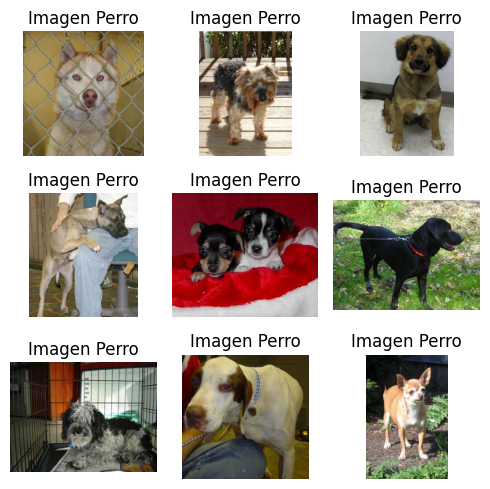

In [3]:
imagen_perro = []
for i in range(9):
    img_path = os.path.join(directorio_perro, archivos_perros[i])
    img = image.load_img(img_path)
    imagen_ar = image.img_to_array(img)
    imagen_ar  /= 255.0
    imagen_perro.append(imagen_ar)
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imagen_perro[i])
    plt.title("Imagen Perro")
    plt.axis("off")

plt.tight_layout()

plt.show()

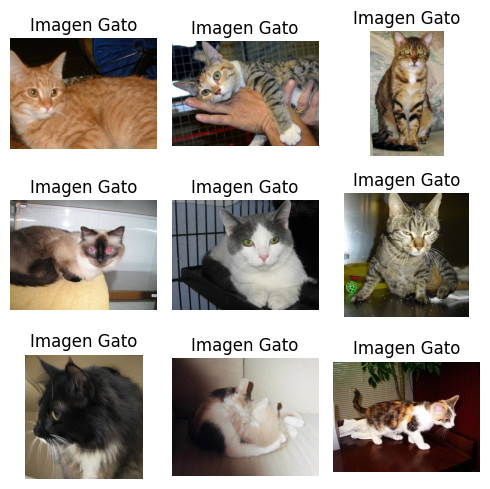

In [4]:
imagen_gato = []
for i in range(9):
    img_path = os.path.join(directorio_gato, archivos_gatos[i])
    img = image.load_img(img_path)
    imagen_ar = image.img_to_array(img)
    imagen_ar  /= 255.0
    imagen_gato.append(imagen_ar)
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(imagen_gato[i])
    plt.title("Imagen Gato")
    plt.axis("off")

plt.tight_layout()

plt.show()

In [5]:
# Definimos tamaño y ruta de imagenes
train_dir = r"/workspaces/Clasficador-de-Imagenes/dogs-vs-cats/train/train"
test_dir = r"/workspaces/Clasficador-de-Imagenes/dogs-vs-cats/test1/test1"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generamos data de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generamos data de prueba
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = [""] 
)

Found 25000 images belonging to 2 classes.


Found 12500 images belonging to 1 classes.


In [6]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [2]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.1), metrics = ["accuracy"])

# Aumenta el tamaño del batch
batch_size = 256  # Ajusta esto según la capacidad de tu hardware

# Train the Model with larger batch size
model.fit(train_data, epochs=1, batch_size=batch_size)


2024-01-26 12:46:41.371806: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 12:46:44.050351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 12:46:44.050752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 12:46:44.418306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 12:46:45.237979: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 12:46:45.238790: I tensorflow/core/platform/cpu_feature_guard.cc:1

NameError: name 'model' is not defined

In [3]:
filepath = r"/workspaces/Clasficador-de-Imagenes/models/mejor_modelo.h5"

checkpoint = ModelCheckpoint(filepath, monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")
hist = model.fit(train_data, steps_per_epoch=100, validation_data=test_data, validation_steps=10, epochs=3, callbacks=[checkpoint, early])



NameError: name 'ModelCheckpoint' is not defined

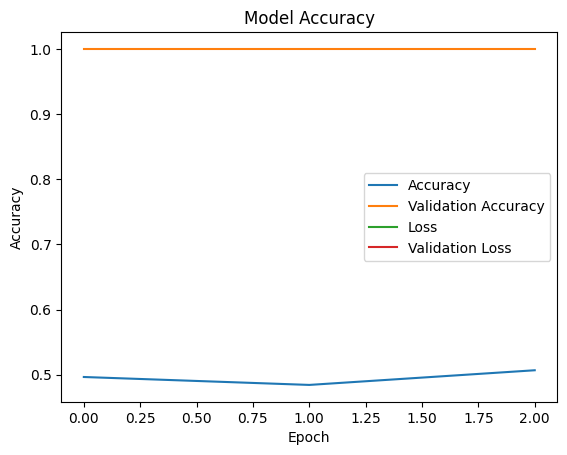

In [9]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 1s 818ms/step
dog


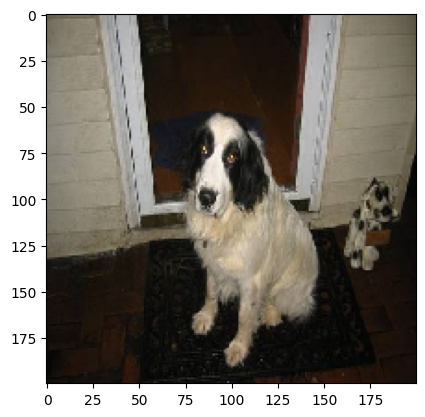

In [10]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img(r"/workspaces/Clasficador-de-Imagenes/dogs-vs-cats/test1/test1/76.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model(r"/workspaces/Clasficador-de-Imagenes/models/mejor_modelo.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

In [11]:
print("Probabilidades:", output)

Probabilidades: [[nan nan]]


In [12]:
print("Métricas de Entrenamiento:")
print(f"   Precisión (entrenamiento): {hist.history['accuracy'][-1]:.4f}")
print(f"   Pérdida (entrenamiento): {hist.history['loss'][-1]:.4f}")
print(f"   Precisión (validación): {hist.history['val_accuracy'][-1]:.4f}")
print(f"   Pérdida (validación): {hist.history['val_loss'][-1]:.4f}")

Métricas de Entrenamiento:
   Precisión (entrenamiento): 0.5069
   Pérdida (entrenamiento): nan
   Precisión (validación): 1.0000
   Pérdida (validación): nan
